In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read and write the image
img = cv2.imread('child.jpg')
cv2.imwrite('output.jpg', img)

True

In [3]:
img.shape

(280, 420, 3)

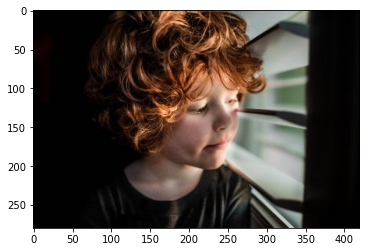

In [4]:
_ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

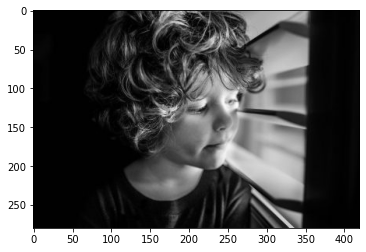

In [5]:
# Convert into gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ = plt.imshow(gray, cmap='gray')

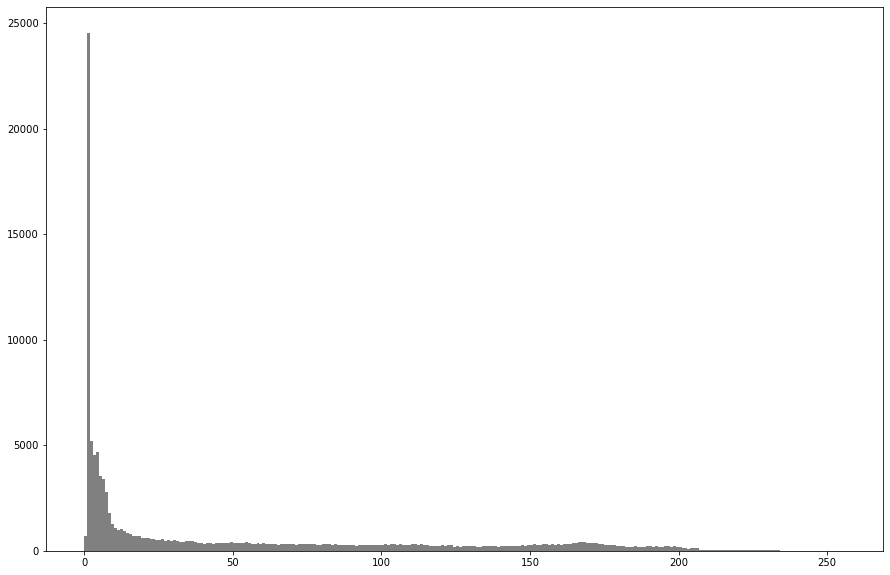

In [6]:
# Plot histogram of gray image
plt.figure(figsize=(15, 10))
_ = plt.hist(gray.ravel(), 256, [0, 256], color='gray')
plt.show()

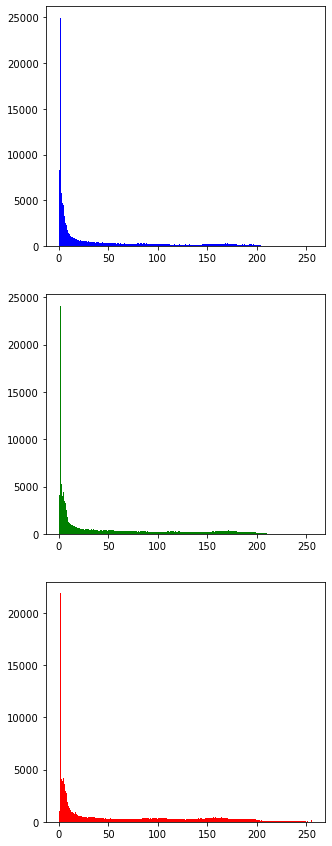

In [7]:
# Plot histogram of color image
plt.figure(figsize=(5, 15))
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.subplot(3, 1, i+1)
    plt.hist(img[:, :, i].ravel(), 256, [0, 256], color=color)
plt.show()

## Image transformation

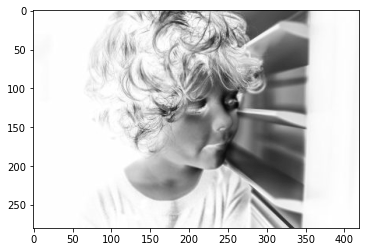

In [8]:
# Negative gray image
gray_neg = 255 - gray
_ = plt.imshow(gray_neg, cmap='gray')

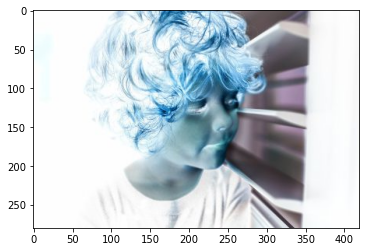

In [9]:
# Negative color image
img_neg = 255 - img
img_neg = cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB)
_ = plt.imshow(img_neg)

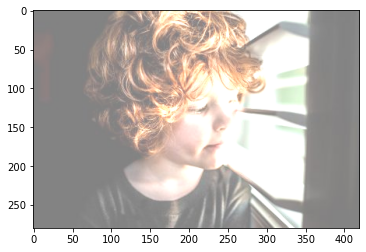

In [10]:
# Increase brightness by adding a value
bright_add = img.copy().astype(np.float32)
k = 130
bright_add += k
bright_add[bright_add > 255] = 255
bright_add = bright_add.astype(np.uint8)
_ = plt.imshow(cv2.cvtColor(bright_add, cv2.COLOR_BGR2RGB))

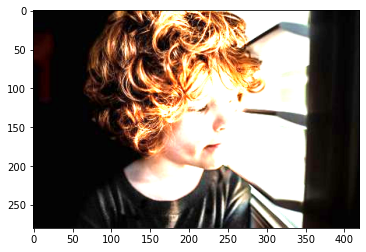

In [11]:
# Increase brightness by multiply a value
bright_mul = img.copy().astype(np.float32)
q = 3
bright_mul *= q
bright_mul[bright_mul > 255] = 255
bright_mul = bright_mul.astype(np.uint8)
_ = plt.imshow(cv2.cvtColor(bright_mul, cv2.COLOR_BGR2RGB))

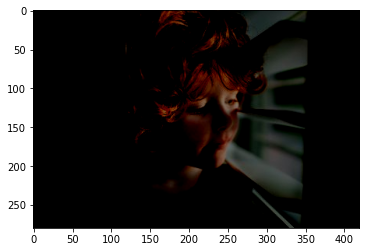

In [12]:
# Decrease brightness by minus a value
bright_sub = img.copy().astype(np.float32)
l = 130
bright_sub -= l
bright_sub[bright_sub < 0] = 0
bright_sub = bright_sub.astype(np.uint8)
_ = plt.imshow(cv2.cvtColor(bright_sub, cv2.COLOR_BGR2RGB))

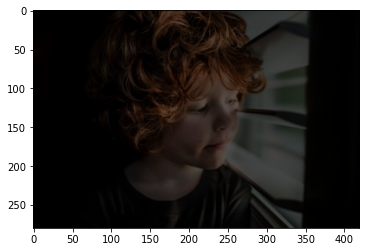

In [13]:
# Decrease brightness by divide a value
bright_div = img.copy().astype(np.float32)
t = 3
bright_div /= t
np.round(bright_div)
bright_div = bright_div.astype(np.uint8)
_ = plt.imshow(cv2.cvtColor(bright_div, cv2.COLOR_BGR2RGB))

## Histogram equalization with gray image

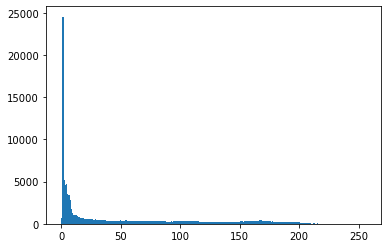

In [14]:
n, bins, _ = plt.hist(gray.ravel(), 256, [0, 256])
total_pixels = sum(n)
n_accum = n.cumsum()

In [15]:
s = np.uint8(np.round((n_accum * 255 / total_pixels)))

In [16]:
s

array([  2,  55,  66,  76,  86,  94, 101, 107, 111, 114, 116, 118, 120,
       122, 124, 126, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 152,
       153, 154, 155, 155, 156, 157, 158, 159, 159, 160, 161, 162, 163,
       163, 164, 165, 166, 167, 167, 168, 169, 170, 170, 171, 172, 172,
       173, 174, 174, 175, 176, 176, 177, 178, 178, 179, 180, 181, 181,
       182, 182, 183, 184, 185, 185, 186, 186, 187, 188, 188, 189, 189,
       190, 190, 191, 192, 192, 193, 194, 194, 195, 195, 196, 197, 197,
       198, 199, 199, 200, 201, 201, 202, 203, 203, 204, 204, 205, 206,
       206, 207, 207, 208, 208, 209, 209, 210, 210, 211, 211, 212, 212,
       213, 213, 213, 214, 214, 215, 215, 216, 216, 217, 217, 217, 218,
       218, 219, 219, 220, 220, 221, 222, 222, 223, 223, 224, 225, 225,
       226, 227, 227, 228, 229, 229, 230, 231, 232, 233, 233, 234, 235,
       236, 237, 238, 238, 239, 240, 240, 241, 242, 242, 243, 24

In [17]:
equ_self = gray.copy()
for i in range(equ_self.shape[0]):
    for j in range(equ_self.shape[1]):
        equ_self[i][j] = s[gray[i][j]]

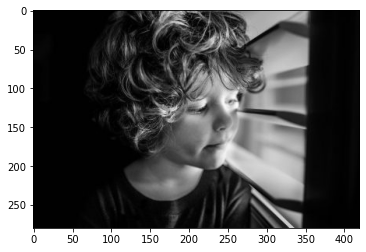

In [18]:
_ = plt.imshow(gray, cmap='gray')

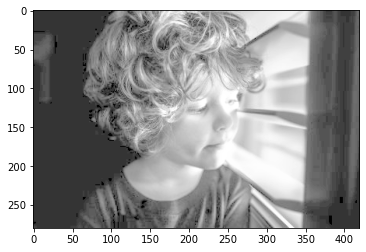

In [19]:
_ = plt.imshow(equ_self, cmap='gray')

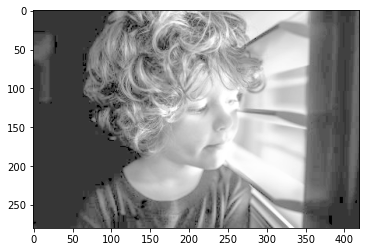

In [20]:
equ_cv2 = cv2.equalizeHist(gray)
_ = plt.imshow(equ_cv2, cmap='gray')

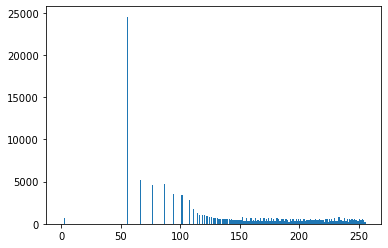

In [21]:
n0, _, _ = plt.hist(equ_self.ravel(), 256, [0, 256])

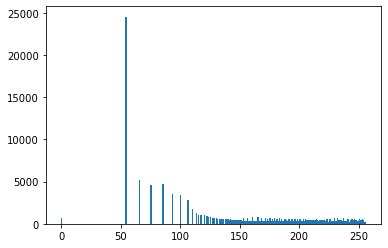

In [22]:
n1, _, _ = plt.hist(equ_cv2.ravel(), 256, [0, 256])

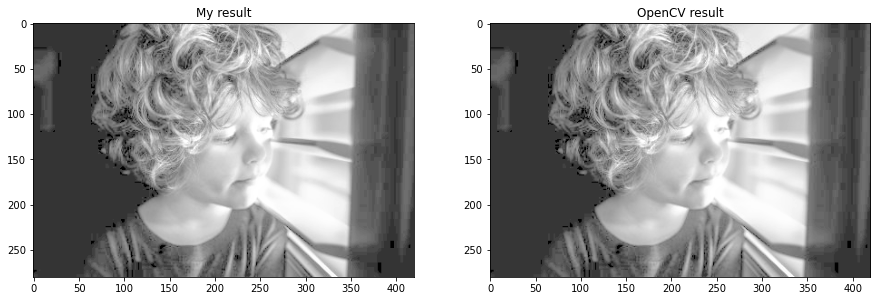

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('My result')
_ = plt.imshow(equ_self, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('OpenCV result')
_ = plt.imshow(equ_cv2, cmap='gray')

We can see that the image and the histogram applied our alogorithm is not much different from the image of OpenCV.
However, if we check the number of pixels of each bins, we can see the difference.

In [24]:
print('My result')
print(n0)
print('OpenCV result')
print(n1)

My result
[    0.     0.   724.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0. 24537.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.  5215.     0.     0.     0.
     0.     0.     0.     0.     0.     0.  4554.     0.     0.     0.
     0.     0.     0.     0.     0.     0.  4702.     0.     0.     0.
     0.     0.     0.     0.  3532.     0.     0.     0.     0.     0.
     0.  3388.     0.     0.     0.     0.     0.  2775.     0.     0.
     0.  1785.     0.     0.  1261.     0.  1066.     0.   987.     0.
  1017.     0.   928.     0.   833.     0.   814.     0.   723.   719.
     0.   698.   623.   627.     0.   596.   536.   576.   534.   5

In [25]:
# And slice the histogram equalised images
print(equ_self[:10, :10])
print(equ_cv2[:10, :10])

[[55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]
 [55 55 55 55 55 55 55 55 55 55]]
[[54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]
 [54 54 54 54 54 54 54 54 54 54]]


Little difference

## Histogram equalization with color image

In [26]:
# We change BGR to HSV space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [27]:
# Only histogram equalization the V dimension
equ_V = cv2.equalizeHist(img_HSV[:, :, 2])
img_HSV[:, :, 2] = equ_V
img_RGB = cv2.cvtColor(img_HSV, cv2.COLOR_HSV2RGB)

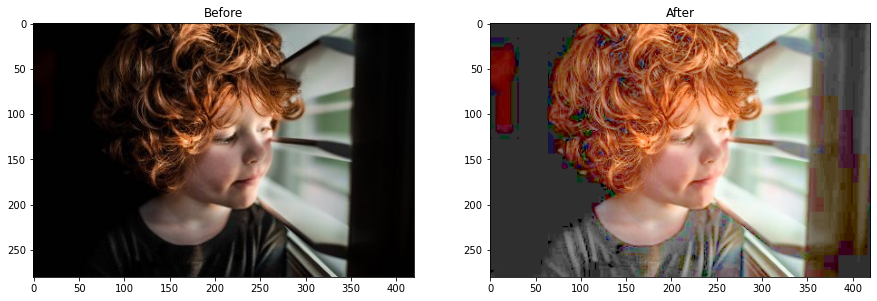

In [28]:
# Compare image before and after histogram equalization
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Before')
_ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('After')
_ = plt.imshow(img_RGB)

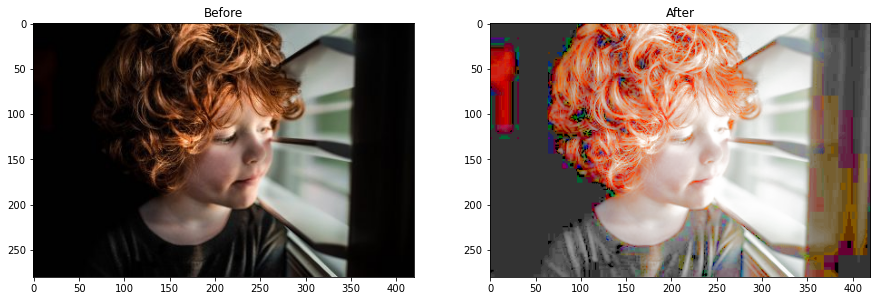

In [29]:
# If we use HSL space and equalized L dimension
img_HLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
equ_L = cv2.equalizeHist(img_HLS[:, :, 1])
img_HLS[:, :, 1] = equ_L
img_RGB2 = cv2.cvtColor(img_HLS, cv2.COLOR_HLS2RGB)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Before')
_ = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('After')
_ = plt.imshow(img_RGB2)